<a href="https://colab.research.google.com/github/DavidJimenez10/Introduccion_Inteligencia_Artificial/blob/main/FuzzyWine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red Wine Quality
Se utilizo el [dataset](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) de kaggle. El cual contiene 11 caracteristicas fisicoquimicas
* fixed acidity
* volatile acidity
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* total sulfur dioxide
* density
* pH
* sulphates
* alcohol


Y se tiene como salida, la calidad (quality) del vino, calificada de 0 a 10



## Instalando librerias

In [ ]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 7.6 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=c93d9aaeffe8c2a9c177dc8ce05a86658cc059ba5f490ba0386c4b22f36d265e
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
!pip install sklearn-genetic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 7.1 MB/s 
     |████████████████████████████████| 139 kB 50.4 MB/s 


## Importando Librerias

In [ ]:
import math

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report

from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

import skfuzzy as fuzz

from genetic_selection import GeneticSelectionCV

## Cargando dataset

In [ ]:
df_wine = pd.read_csv("/content/winequality-red.csv")

In [ ]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


No hay datos nulos para ninguna variable y todas son numericas por defecto, esto resulta ser muy ventajoso ya que no es necesario hacer imputacion o tratamientos previos para ingresar los datos a un modelo

## Analisis variable objetivo

In [ ]:
df_wine['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

Aunque la variable calidad tiene el rango de 0 a 10, la variable solo toma valores entre 3 y 8, esto tiene mucho sentido pues las calificaciones son subjetivas y rara vez calificamos algo como perfecto (10) o completamente horrible (0).

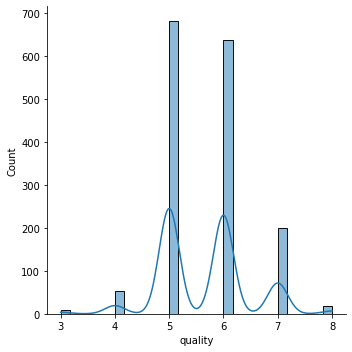

In [ ]:
sns.displot(df_wine, x = "quality", kde = True)

In [ ]:
df_wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

En la distribucion de los datos la mayoria de vinos tiene una calificacion, segun mi criterio, como media/alta (entre 5 y 7)

## Selección de Caracteristicas
### Boxplots

**Fixed acidity**: Existen varios fixed acids como tartaric, malic, citric, and succinic. La mayoría de los ácidos involucrados con el son fijos o no volátiles (no se evaporan fácilmente)

Los vinos con mejor calificacion tienes una acidez entre 8 y 10

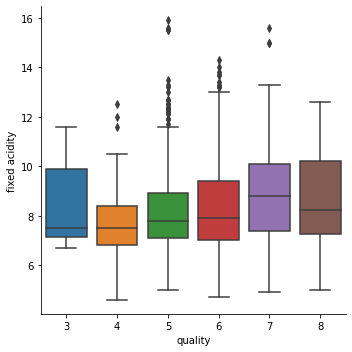

In [ ]:
sns.catplot(x="quality", y="fixed acidity", kind="box", data=df_wine)

**Volatile acidity**: medida de los ácidos grasos de bajo peso molecular (o destilables al vapor) en el vino. Mide la cantidad de ácido acético en el vino, que en niveles demasiado altos puede provocar un sabor desagradable a vinagre. En cantidades de 0,2 a 0,4 g/L, la acidez volátil no afecta la calidad del vino.


En el caso de este dataset se cumple la regla, vinos con mayor volatile acidity tienen calificaciones mas bajas por su sabor a vinagre, aunque el rango de los vinos del dataset vas mas entre 0.3 y 0.5 g/L


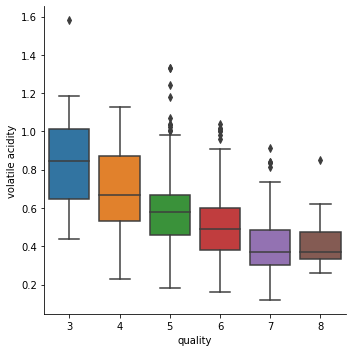

In [ ]:
sns.catplot(x="quality", y="volatile acidity", kind="box", data=df_wine)

**Citric acid**: El ácido cítrico es uno de los ácidos que se encuentran con menos frecuencia en el vino. Este ácido es un compuesto orgánico débil que se encuentra comúnmente en frutas cítricas. El ácido cítrico puede agregar 'frescura' y sabor a los vinos. Por ello una mayor acidez se percibe como positiva.


Se puede ver que los vinos de mejor calificacion tienden a tener esta acidez myor a 0.3 g/L

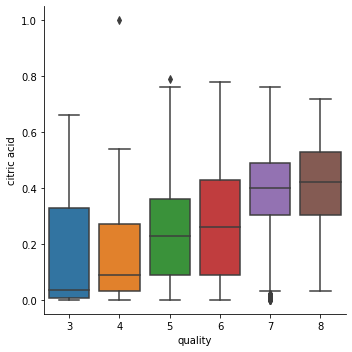

In [ ]:
sns.catplot(x="quality", y="citric acid", kind="box", data=df_wine)

**Residual sugar**: la cantidad de azúcar que queda después de la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces. En un cierto nivel, el azúcar residual puede ayudar a que un vino ácido y fuerte tenga un sabor más suave y también hacer que un vino simple sea más sabroso.

Esta variable suele ser importante para los catadores, pues un vino muy dulce es considerado de baja calidad, pero en el caso de nuestro dataset, se tienen valores muy parecidos para calificaciones completamente diferentes.

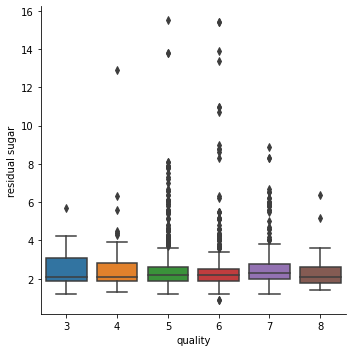

In [ ]:
sns.catplot(x="quality", y="residual sugar", kind="box", data=df_wine)

**Chlorides**: la cantidad de sal en el vino. Se utilizan para ayudar a ajustar la acidez y el sabor.

Se puede observar que los vinos de mejor calidad suelen tener menos contenido de sal, menor a 0.8 g/L. Pero los valores se diferencias muy poco.

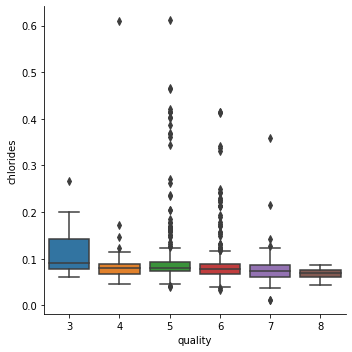

In [ ]:
sns.catplot(x="quality", y="chlorides", kind="box", data=df_wine)

**Free sulfur dioxide**: la forma libre de SO2 existe en equilibrio entre el SO2 molecular (como gas disuelto) y el ion bisulfito (HSO3–); previene el crecimiento microbiano y la oxidación del vino. La Unión Europea estableció un nivel máximo permitido de SO2 total en el vino que varía de 150 a 500 mg/L, que depende del nivel de azúcar del producto.

Todos los vinos del dataset presentan bajos niveles de esta molecula

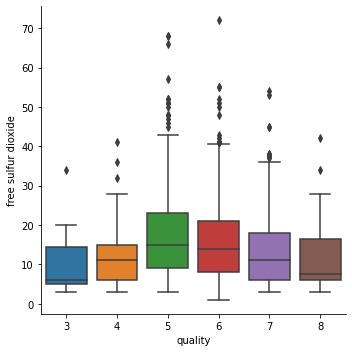

In [ ]:
sns.catplot(x="quality", y="free sulfur dioxide", kind="box", data=df_wine)

**Total sulfur dioxide**: cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es mayormente indetectable en el vino, pero en concentraciones de SO2 libres superiores a 50 ppm, el SO2 se vuelve evidente en la nariz y el sabor del vino.

Para el total se S02 tenemos que los vinos de cumplen el criterio de estar debajo de 50 ppm

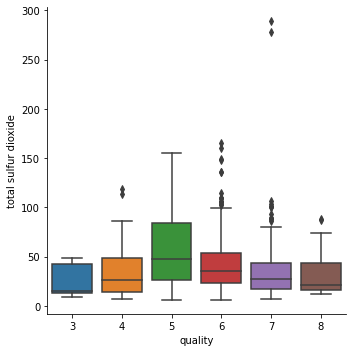

In [ ]:
sns.catplot(x="quality", y="total sulfur dioxide", kind="box", data=df_wine)

**Density**: la densidad del vino es cercana a la del agua dependiendo del porcentaje de contenido de alcohol y azúcar.

La densidad del vino parece ser inversamente proporcional a su calidad, el problema es que las diferencias no son muy significativas

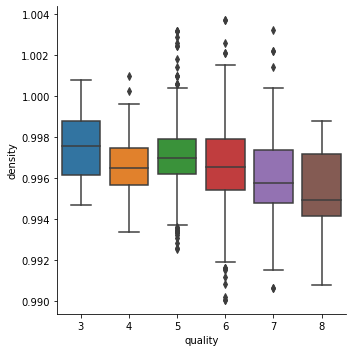

In [ ]:
sns.catplot(x="quality", y="density", kind="box", data=df_wine)

**pH**: describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3 y 4 en la escala de pH. 

La mayoria de vinos del dataset cumplen el rango mencionado, los vinos de mejor calidad parecen tener un ph entre 3.3 y 3.2. Esta variable se deberia encontrar altamente relacionada con las otras caracteristicas de acidez.

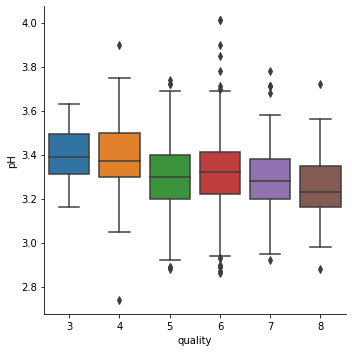

In [ ]:
sns.catplot(x="quality", y="pH", kind="box", data=df_wine)

**sulphates**: un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (S02), que actúa como antimicrobiano y antioxidante (conservante). El vino generalmente contiene un rango de 5 mg/L a 200 mg/L de sulfitos y un vino tinto seco bien elaborado generalmente tiene alrededor de 50 mg/L de sulfitos.

En el dataset los vinos de mejor calidad suelen tener un sulfato superior a 60 mg/L

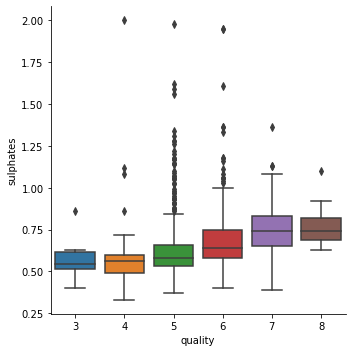

In [ ]:
sns.catplot(x="quality", y="sulphates", kind="box", data=df_wine)

**Alcohol**: Un vino con un contenido de alcohol más alto tendrá un cuerpo más completo y rico, mientras que un vino con un nivel de alcohol más bajo tendrá un sabor más ligero y delicado en el paladar. Esta caracteristicas suele ser apreciada hasta un rango donde el vino no se considere un licor fuerte.

En el dataset podemos ver que porcentajes superiores a 10% son asociados con vinos de mejor calidad

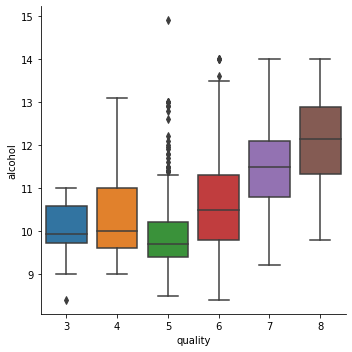

In [ ]:
sns.catplot(x="quality", y="alcohol", kind="box", data=df_wine)

### Correlacion

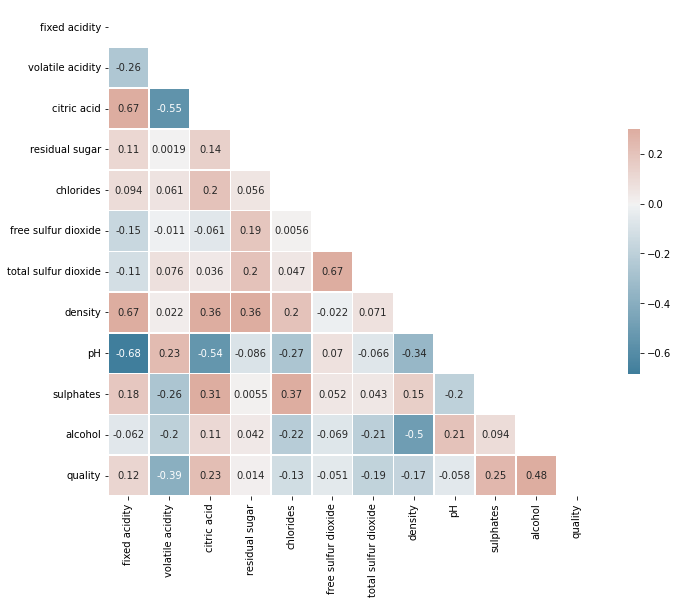

In [ ]:
corr = df_wine.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

Se observa que las 5 variables con mayor correlacion lineal son 
* alcohol
* volatile acidity
* sulphates
* citric acid
* total sulfur dioxide


Tambien es importante destacar que las variables volatile acidity y citric acid tienen una alta correlacion

## Seleccion con algoritmos geneticos

In [ ]:
X = df_wine.loc[:, df_wine.columns != 'quality'].to_numpy()
y = df_wine['quality'].to_numpy()
#OVR para multiclass, 1 vs rest
estimator = linear_model.LogisticRegression(solver = "liblinear", multi_class = 'ovr')

selector = GeneticSelectionCV(
        estimator,
        cv=5,
        verbose=1,
        scoring="accuracy",
        max_features=4,
        n_population=100,
        crossover_proba=0.5,
        mutation_proba=0.3,
        n_generations=50,
        crossover_independent_proba=0.5,
        mutation_independent_proba=0.05,
        tournament_size=3,
        n_gen_no_change=10,
        caching=True,
        n_jobs=-1,
    )

selector = selector.fit(X, y)

print(selector.support_)

Selecting features with genetic algorithm.
gen	nevals	avg                            	std                            	min                            	max                            
0  	100   	[ 0.474996  2.38      0.02624 ]	[ 0.043949  1.138244  0.013293]	[ 0.400264  1.        0.00123 ]	[ 0.572866  4.        0.059108]
1  	65    	[-599.522156    2.9       600.031316]	[ 2374.989143     1.195826  2374.860506]	[-10000.           0.           0.00123]	[     0.572866      6.        10000.      ]
2  	71    	[-1199.530068     3.01      1200.033525]	[ 3249.788896     1.337871  3249.602982]	[-10000.            0.            0.002588]	[     0.572866      6.        10000.      ]
3  	65    	[-1199.515131     3.07      1200.035371]	[ 3249.794412     1.193776  3249.6023  ]	[-10000.            1.            0.016897]	[     0.572866      6.        10000.      ]
4  	72    	[-599.476611    3.06      600.034328]   	[ 2375.000649     1.066021  2374.859745]	[-10000.            0.            0.012717]	[    

In [ ]:
X = df_wine.loc[:, df_wine.columns != 'quality'].to_numpy()
y = df_wine['quality'].to_numpy()
estimator = DecisionTreeClassifier()

selector = GeneticSelectionCV(
        estimator,
        cv=5,
        verbose=1,
        scoring="accuracy",
        max_features=4,
        n_population=100,
        crossover_proba=0.5,
        mutation_proba=0.3,
        n_generations=50,
        crossover_independent_proba=0.5,
        mutation_independent_proba=0.05,
        tournament_size=3,
        n_gen_no_change=10,
        caching=True,
        n_jobs=-1,
    )

selector = selector.fit(X, y)

print(selector.support_)

Selecting features with genetic algorithm.
gen	nevals	avg                            	std                            	min                            	max                            
0  	100   	[ 0.411777  2.61      0.027303]	[ 0.032816  1.094486  0.009441]	[ 0.338966  1.        0.004409]	[ 0.523431  4.        0.049992]
1  	65    	[-599.588899    2.5       600.025757]	[ 2374.97228      1.352775  2374.86191 ]	[-10000.            0.            0.011111]	[     0.523431      6.        10000.      ]
2  	73    	[-699.582851    2.21      700.025922]	[ 2551.58461      1.290697  2551.463053]	[-10000.            0.            0.011458]	[     0.523431      6.        10000.      ]
3  	58    	[-499.559516    1.99      500.027877]	[ 2179.550526     1.126898  2179.443076]	[-10000.            0.            0.006554]	[     0.523431      5.        10000.      ]
4  	72    	[-399.540416    1.72      400.029241]	[ 1959.685607     0.990757  1959.585825]	[-10000.           0.           0.01434]   	[     0.523

## Graficando variables seleccionadas

In [ ]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
X_feat_log_reg = df_wine[['volatile acidity','total sulfur dioxide','sulphates','alcohol','quality']]
#[False  True False False False False  True False False  True  True]

In [ ]:
X_feat_tree = df_wine[['alcohol','quality']]
#[False False False False False False False False False False  True]

In [ ]:
df_melt = X_feat_log_reg.melt(id_vars=['quality'], var_name='features')

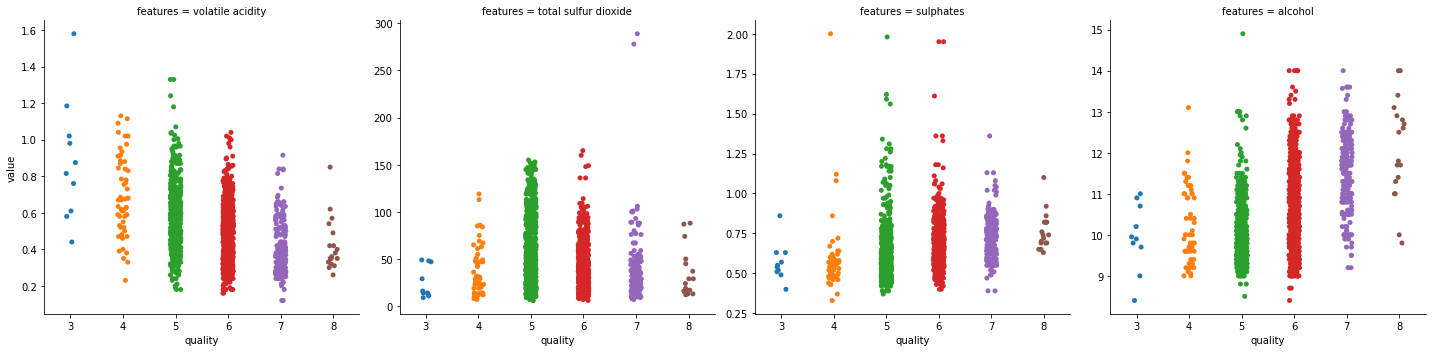

In [ ]:
sns.catplot(data=df_melt, x='quality', y='value', col='features', sharey=False)

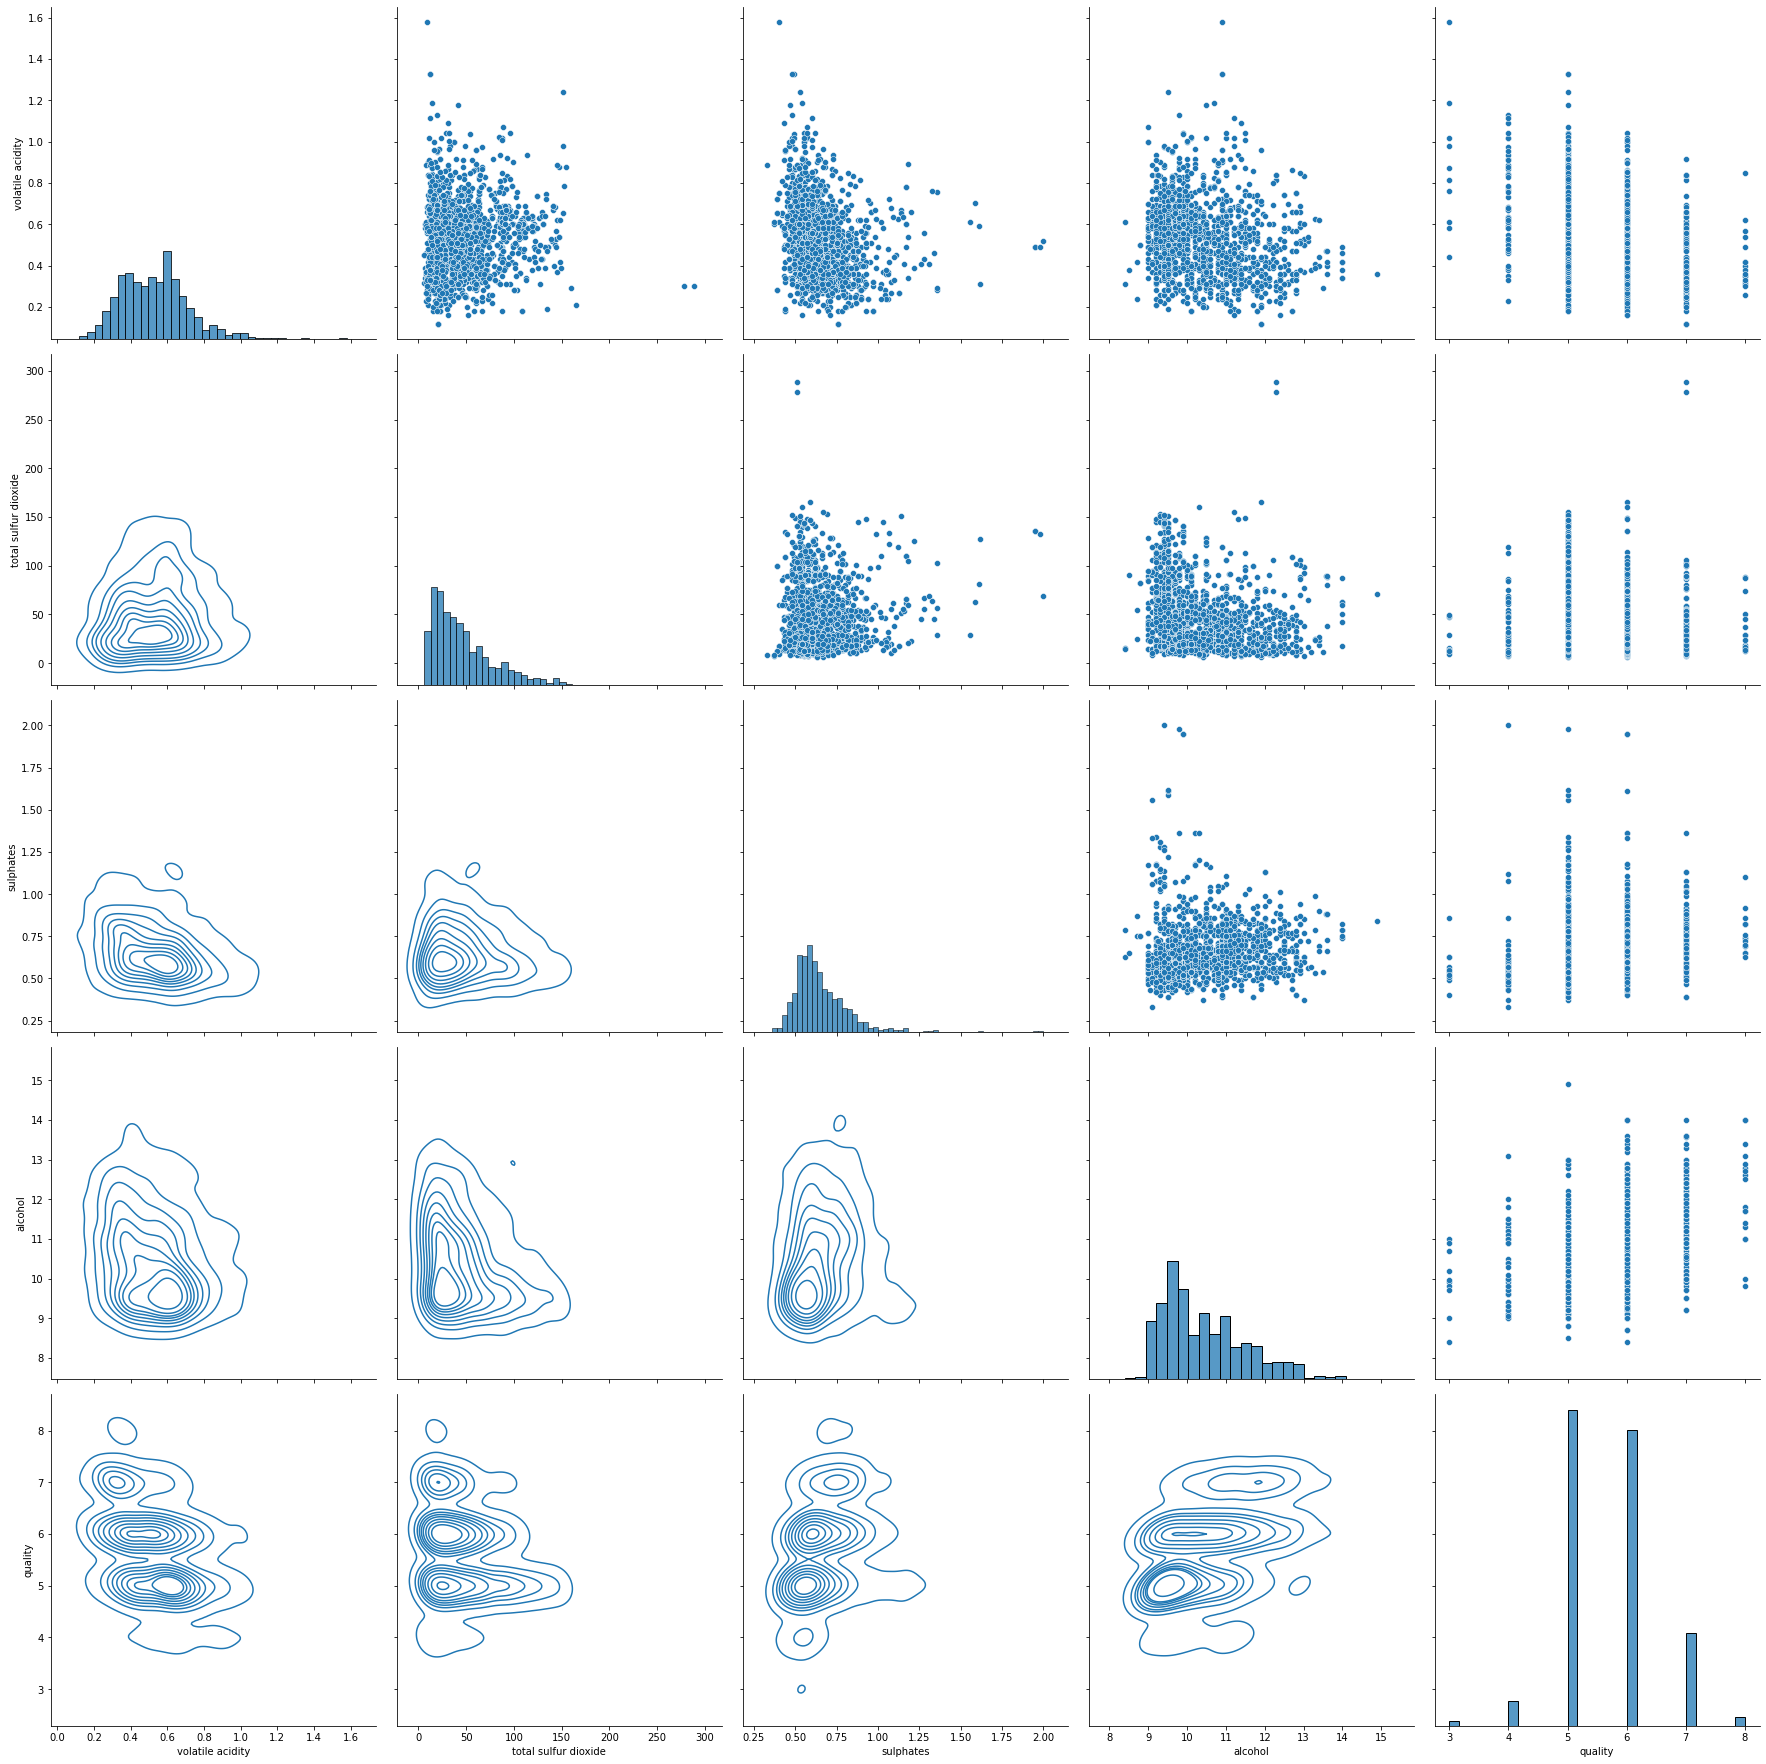

In [ ]:
g = sns.PairGrid(X_feat_log_reg,height=5)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)

In [ ]:
X_feat_log_reg.describe()

,volatile acidity,total sulfur dioxide,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.527821,46.467792,0.658149,10.422983,5.636023
std,0.179060,32.895324,0.169507,1.065668,0.807569
min,0.120000,6.000000,0.330000,8.400000,3.000000
25%,0.390000,22.000000,0.550000,9.500000,5.000000
50%,0.520000,38.000000,0.620000,10.200000,6.000000
75%,0.640000,62.000000,0.730000,11.100000,6.000000
max,1.580000,289.000000,2.000000,14.900000,8.000000


## MLP Base
### Feature Logistic

In [ ]:
X = X_feat_log_reg[['volatile acidity','total sulfur dioxide','sulphates','alcohol']].to_numpy()
y = X_feat_log_reg['quality'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)
clf = MLPClassifier( max_iter=1000).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        13
           5       0.69      0.64      0.66       170
           6       0.52      0.75      0.62       160
           7       0.62      0.16      0.25        50
           8       0.00      0.00      0.00         5

    accuracy                           0.59       400
   macro avg       0.30      0.26      0.26       400
weighted avg       0.58      0.59      0.56       400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Feature Tree

In [ ]:
X = X_feat_tree['alcohol'].to_numpy()
y = X_feat_tree['quality'].to_numpy()
X = X.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)
clf = MLPClassifier( max_iter=1000).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        13
           5       0.61      0.78      0.69       170
           6       0.49      0.56      0.52       160
           7       0.00      0.00      0.00        50
           8       0.00      0.00      0.00         5

    accuracy                           0.56       400
   macro avg       0.18      0.22      0.20       400
weighted avg       0.46      0.56      0.50       400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Modelo Fuzzy

Para el ejercicio de modelado se seleccionaron 3 variables, los rango de los conjuntos fuzzy se pensaron planteando la division de la calidad en los rangos:

* 0-4 Calificacion Baja
* 5-7 Calificacion Regular
* 8-10 Calificacion Buena

**Volatile acidity**: Para esta variable se plantean 2 valores fuzzy, acidity_low y acidity_normal, segun lo identificado en los boxplot, una acidez menor esta correlacionada con una mayor calificacion, pues a mayor volatile acidity el vino tendra sabor a vinagre. El rango para esta variable segun la bibliografia y el dataset, es bajo si es menor a 0.4 y mas o menos despues de 0.7 tenemos las peores calificaciones.

**Sulphates**: Para esta variable se plantean 2 valores fuzzy, sulphates_normal y sulphates_high, donde segun lo observado un mayor nivel de este compuesto conserva mejor el vino, se observa que las mejores calificaciones tienen valores superiores a 0.7, menor a este rango hay una zona gris donde no se puede serparar facilmente valores malos de regulares.

**Alcohol**: Para esta variables se plantearon 2 valores fuzzy, alcohol_normal y alcohol_high, segun lo observado un mayor nivel de alcohol se califica positivamente. Valores por encima de 11% suelen tener una mejor calificaciones, aunque se tienen alguno outliers que introducen ruido en esta regla. Y se tiene una zona gris entre 9 y 11 donde no se puede calificar el vino como malo o regular facilmente.

Por ultimo, la variable **total sulfur dioxide** no se incluyo en el sistema fuzzy pues presenta valores similares para calificaciones diferentes (ej:3 y 8), ademas de tener varios outliers que introducen ruido


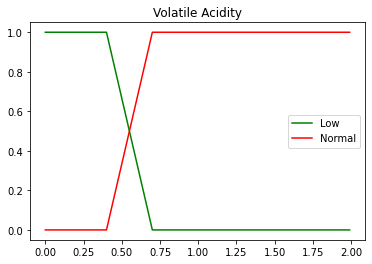

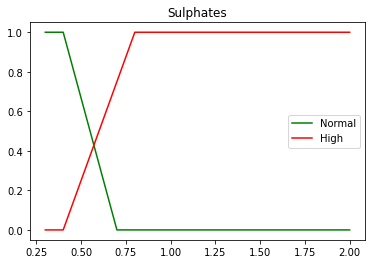

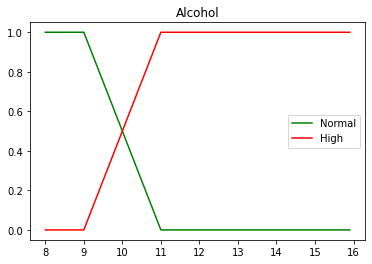

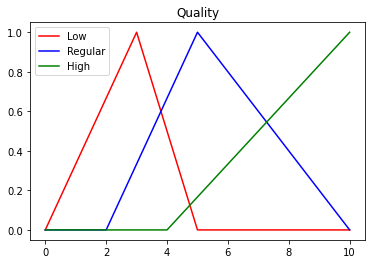

In [ ]:
#ANTECEDENT
#Volatile acidity
mf_acidity = np.arange(0, 2, 0.01)
acidity_low = fuzz.trapmf(mf_acidity, [-0.01, 0, 0.4,0.7])
acidity_normal = fuzz.trapmf(mf_acidity, [0.4, 0.7, 1.99, 2])
#Sulphates
mf_sulphates = np.arange(0.3, 2.01, 0.01)
sulphates_normal = fuzz.trapmf(mf_sulphates, [-0.01, 0, 0.4, 0.7])
sulphates_high = fuzz.trapmf(mf_sulphates, [0.4, 0.8, 2.0, 2.01])
#Alcohol
mf_alcohol = np.arange(8, 16, 0.1)
alcohol_normal = fuzz.trapmf(mf_alcohol, [7.9, 8, 9, 11])
alcohol_high = fuzz.trapmf(mf_alcohol, [9, 11, 15.9, 16])

#CONSEQUENT
#Quality
mf_quality = np.arange(0, 11, 1)
quality_low = fuzz.trimf(mf_quality, [0, 3, 5]) #Malo es de 0-4
quality_regular = fuzz.trimf(mf_quality, [2, 5, 10]) #Regular es de 5-6
quality_high = fuzz.trimf(mf_quality, [4, 10, 10]) #Bueno es de 7 a 10
"""
#Quality
mf_quality = np.arange(0, 11, 1)
quality_low = fuzz.trimf(mf_quality, [0, 0, 5]) 
quality_regular = fuzz.trimf(mf_quality, [2, 5, 8]) 
quality_high = fuzz.trimf(mf_quality, [5, 10, 10]) 
"""
#PLOTS
plt.plot(mf_acidity, acidity_low, 'g', linewidth=1.5, label='Low')
plt.plot(mf_acidity, acidity_normal, 'r', linewidth=1.5, label='Normal')
plt.title('Volatile Acidity')
plt.legend()
plt.show()

plt.plot(mf_sulphates, sulphates_normal, 'g', linewidth=1.5, label='Normal')
plt.plot(mf_sulphates, sulphates_high, 'r', linewidth=1.5, label='High')
plt.title('Sulphates')
plt.legend()
plt.show()

plt.plot(mf_alcohol, alcohol_normal, 'g', linewidth=1.5, label='Normal')
plt.plot(mf_alcohol, alcohol_high, 'r', linewidth=1.5, label='High')
plt.title('Alcohol')
plt.legend()
plt.show()

plt.plot(mf_quality, quality_low, 'r', linewidth=1.5, label='Low')
plt.plot(mf_quality, quality_regular, 'b', linewidth=1.5, label='Regular')
plt.plot(mf_quality, quality_high, 'g', linewidth=1.5, label='High')
plt.title('Quality')
plt.legend()
plt.show()

El conjunto fuzzy para quality se planteo con tres valores, teniendo en cuenta la distribucion de la variable
* **Low**: Esta curva comprende los valores 0-4, el centro del triangulo se puso en 3 para evitar que se den calificaciones de 0 a 2 pues en la distribucion de los datos no se tienen ninguna
* **Regular**: Esta curva busca a comprender los valores de 5-7, esta es la curva que mas valores abarca pues la mayoria de los vinos se encuentran calificados en alguno de estos valores
* **High**: Esta curva busca comprender los valores de 8-10, aunque el dataset unicamente tiene unos pocos valores de 8.

## Fuzzificacion

In [ ]:
def FuzzfyAcidity(AcidVal):
  #Calculo funcion de pertenencia volatile acid
  fzz_Acid = np.zeros(2)

  fzz_Acid[0] = fuzz.interp_membership(mf_acidity, acidity_low, AcidVal)
  fzz_Acid[1] = fuzz.interp_membership(mf_acidity, acidity_normal, AcidVal)

  return fzz_Acid

def FuzzfySul(SulVal):
  #Calculo funcion de pertenencia sulphates
  fzz_Sul = np.zeros(2)

  fzz_Sul[0] = fuzz.interp_membership(mf_sulphates, sulphates_normal, SulVal)
  fzz_Sul[1] = fuzz.interp_membership(mf_sulphates, sulphates_high, SulVal)
  
  return fzz_Sul

def FuzzfyAlco(AlcoVal):
  #Calculo funcion de pertenencia alcohol
  fzz_Alco = np.zeros(2)

  fzz_Alco[0] = fuzz.interp_membership(mf_alcohol, alcohol_normal, AlcoVal)
  fzz_Alco[1] = fuzz.interp_membership(mf_alcohol, alcohol_high, AlcoVal)
  
  return fzz_Alco

## Reglas

Con los 3 antecedente planteados, se generan 8 reglas. El planteamiento usado es sencillo

si las 3 variables se encuentran en su valor "bueno" (alcohol alto, volatile acidity bajo, sulphates altos), la salida se califica como alta

si las 2 o 1 variable(s) se encuentran en su valor "bueno" (alcohol alto, volatile acidity bajo, sulphates altos), la salida se califica como regular, esta es la regla mas comun y pues esto ayuda a que la mayoria de los datos sean calificados en este rango


si las ninguna de las variables se encuentran en su valor "bueno" (alcohol alto, volatile acidity bajo, sulphates altos), la salida se califica como low

**Alcohol Normal**

| VA/S     | Normal     | High       |
| -------- | ---------- | ---------- |
| Low      | Regular    | Regular    | 
| Normal   | Low        | Regular    |

**Alcohol High**

| VA/S     | Normal     | High       |
| -------- | ---------- | ---------- |
| Low      | Regular    | High       | 
| Normal   | Regular    | Regular    |

In [ ]:
def evalRules(fuzzedAcidity, fuzzedSul, fuzzedAlco):
  # Tenemos 8 posibilidades

  #Variable de salida
  outVarS = np.zeros(3)

  # min = AND
  # max = OR
  outVarS[1] = max(outVarS[1], min(fuzzedAcidity[0], fuzzedSul[0], fuzzedAlco[0])) # rule1 alcohol normal AND acidity low AND sulphates normal  
  outVarS[0] = max(outVarS[0], min(fuzzedAcidity[1], fuzzedSul[0], fuzzedAlco[0])) # rule2 alcohol normal AND acidity normal AND sulphates normal  
  outVarS[1] = max(outVarS[1], min(fuzzedAcidity[0], fuzzedSul[1], fuzzedAlco[0])) # rule3 alcohol normal AND acidity low AND sulphates high  
  outVarS[1] = max(outVarS[1], min(fuzzedAcidity[1], fuzzedSul[1], fuzzedAlco[0])) # rule4 alcohol normal AND acidity normal AND sulphates high  
  
  outVarS[1] = max(outVarS[1], min(fuzzedAcidity[0], fuzzedSul[0], fuzzedAlco[1])) # rule5 alcohol high AND acidity low AND sulpahtes normal 
  outVarS[1] = max(outVarS[1], min(fuzzedAcidity[1], fuzzedSul[0], fuzzedAlco[1])) # rule6 alcohol high AND acidity normal AND sulpahtes normal 
  outVarS[2] = max(outVarS[2], min(fuzzedAcidity[0], fuzzedSul[1], fuzzedAlco[1])) # rule7 alcohol high AND acidity low AND sulpahtes high 
  outVarS[1] = max(outVarS[1], min(fuzzedAcidity[1], fuzzedSul[1], fuzzedAlco[1])) # rule8 alcohol high AND acidity normal AND sulpahtes high 

  return outVarS


In [ ]:
def setOutMFs(outRuleVars):
  # Crea funciones de pertenencia para la salida, en el rango de la variables

  q_low_max = np.full(np.shape(mf_quality),outRuleVars[0])
  q_ave_max = np.full(np.shape(mf_quality),outRuleVars[1])
  q_hig_max = np.full(np.shape(mf_quality),outRuleVars[2])

  q_out_low = np.fmin(q_low_max, quality_low)
  q_out_ave = np.fmin(q_ave_max, quality_regular)
  q_out_high = np.fmin(q_hig_max, quality_high)

  q_Out_mfs = np.stack((q_out_low, q_out_ave, q_out_high))

  return q_Out_mfs

In [ ]:
def execFzzedRules(scroeAcidity, scoreSul, scoreAlco, grahp = False):
  #Inferencia con fuzzy

  # Obteniendo valores fuzzificados
  fzzedAcidity = FuzzfyAcidity(scroeAcidity)
  fzzedSul = FuzzfySul(scoreSul)
  fzzedAlco = FuzzfyAlco(scoreAlco)

  #print('fzzedAcidity',fzzedAcidity,'fzzedSul',fzzedSul,'fzzedAlco',fzzedAlco)

  #Evaluacion de las reglas y grado de pertenencia a la salida
  EvaledRs = evalRules(fzzedAcidity, fzzedSul, fzzedAlco)
  outMFs = setOutMFs(EvaledRs)

  #Agregacion de la salida
  outTempMF =  fuzz.fuzzy_or(mf_quality, outMFs[0], mf_quality, outMFs[1])
  outTotalMF =  fuzz.fuzzy_or(mf_quality, outTempMF[1], mf_quality, outMFs[2])

  #Defuzzificacion de la variables de salida con el centroide de la curva
  fQual = fuzz.defuzz(outTotalMF[0], outTotalMF[1],'centroid')
  
  if grahp:
    plt.plot(outTotalMF[0], outTotalMF[1], 'r', linewidth=3, label='Final aggregated MFs')
    plt.plot([fQual,fQual], [0, 1], 'g', linewidth=1.5, label='Defuzz Result')
    plt.title('Aggregated MFs')
    plt.legend()
    plt.show()

  print('Quality (fuzzifying) = ', fQual)

  return (math.floor(fQual))

## Rangos salida fuzzy

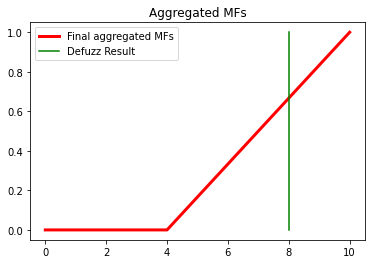

Quality (fuzzifying) =  8.0


8

In [ ]:
execFzzedRules(0.4,0.8,13,True)#VA;SUL,ALCO

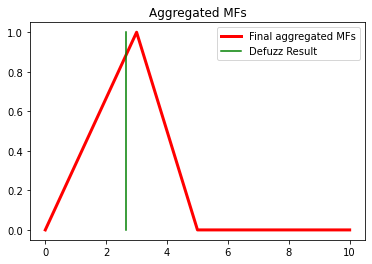

Quality (fuzzifying) =  2.6666666666666816


2

In [ ]:
execFzzedRules(0.8,0.4,9,True)#VA;SUL,ALCO

## MLP Base

In [ ]:
X_feat_fuzzy = df_wine[['volatile acidity','sulphates','alcohol','quality']]
X = X_feat_fuzzy[['volatile acidity','sulphates','alcohol']].to_numpy()
y = X_feat_fuzzy['quality'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

In [ ]:
clf = MLPClassifier(max_iter=1000).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        13
           5       0.63      0.73      0.68       170
           6       0.52      0.59      0.56       160
           7       0.50      0.22      0.31        50
           8       0.00      0.00      0.00         5

    accuracy                           0.57       400
   macro avg       0.28      0.26      0.26       400
weighted avg       0.54      0.57      0.55       400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Evaluacion Fuzzy

In [ ]:
#Obteniendo predicciones
y_pred = []
for scroeAcidity, scoreSul, scoreAlco in X_test:
  y_pred.append(execFzzedRules(scroeAcidity, scoreSul, scoreAlco))
y_pred = np.array(y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.05      0.23      0.09        13
           5       0.51      0.55      0.53       170
           6       0.57      0.32      0.41       160
           7       0.34      0.42      0.38        50
           8       0.14      0.20      0.17         5

    accuracy                           0.42       400
   macro avg       0.27      0.29      0.26       400
weighted avg       0.49      0.42      0.44       400



#Primer curva salida, rangos sin tener en cuenta la distribucion

1-8

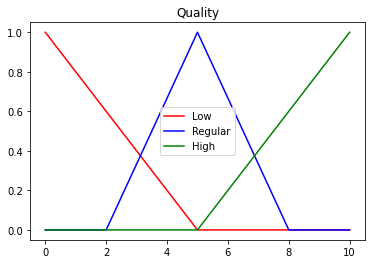

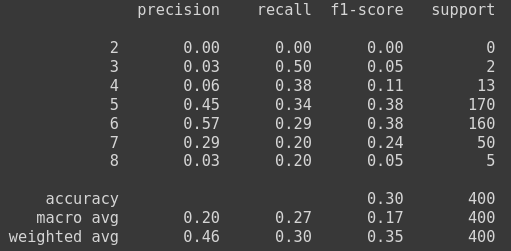

## Analisis
### Vaguedad en el problema:

Obviamente al estar la salida basada puramente en una calificacion sensorial, la cual suele implicar una inspeccion visual, olfativa y la desgustacion. Visualmente se tiene mucha vaguedad sobre cuando se define color y tono. Olfativamente se dan calificaciones linguisticas, pues la intensidad en el olor es media, baja o alta, y se identifican aromas primarios, secundarios y terciarios. Por ultimo en la degustancion se tienen 3 fases la entrada en boca, la evolucion y post-gusto, resultan ser conceptos vagos y por lo mismo se suelen calificar con adjetivos.

###Fuentes de incertidumbre:
El dataset no aclara si las calificaciones son dadas por un mismo catador, tampoco aclara la metodologia, si fueron catas seguidas o separadas en el tiempo, si los vinos fueron servidos en las mismas condiciones, si la cata fue a ciegas.

**Epistemica**
* Solo se tienen vinos rojos de portugal 
* El dataset no proporciona las unidades de las variables
* La distribucion de la salida supongo es una normal, pero igual hace falta muestras para los valores de 0-2 y 9-10
* El dataset unicamente tiene variables fisico-quimicas, que a pesar de poder ser identificadas por los catadores, son muy limitadas. Claramente en la calificacion influyen variables como la marca del vino, tipo de uva, precio, ubicacion del viñedo

**Aleatoria**
* Todas la variables tienen outliers lo cual puede implicar una mala medicion o la falta de alguna otra variable
* En el caso de los sulfur dioxide la medicion de este compuesto tan importante no se hace directamente